# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Marvin Wijaya
- **Email:** marvin.mw19@gmail.com
- **ID Dicoding:** marvinw34

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan antara pengguna biasa dan pengguna yang telah registrasi?
- Apakah ada perbedaan yang signifikan antara peminjaman sepeda pada hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Input data day.csv
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Input data hour.csv
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** Penjelasan variabel

instant: indeks

dteday : tanggal

season : musim (1:semi, 2:panas, 3:gugur, 4:dingin)

yr : tahun (0: 2011, 1:2012)

mnth : bulan ( 1 - 12)

hr : jam (0 - 23)

holiday : hari libur atau bukan

weekday : hari ke- (dalam satu minggu)

workingday : bernilai 1 jika hari kerja, 0 jika bukan

weathersit :
1: cerah
2: berawan
3: hujan/salju ringan
4: hujan/salju deras

temp : suhu dalam celcius

atemp: suhu yang dirasakan dalam celcius

hum: kelembaban

windspeed: kecepatan angin

casual: jumlah pengguna biasa

registered: jumlah pengguna yang sudah registrasi

cnt: jumlah keseluruhan (casual + registered)

### Assessing Data

In [4]:
#Data day.csv
#Mengecek jumlah dan tipe data
day_df.info()
#Mengecek jumlah duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())
#Menampilkan statistik deskriptif
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

tidak ada missing value dan duplikasi, tapi tipe data dteday bukan datetime

In [5]:
#Data hour.csv
#Mengecek jumlah dan tipe data
hour_df.info()
#Mengecek jumlah duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
#Menampilkan statistik deskriptif
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000





**Insight:**

tidak ada missing value dan duplikasi, tapi tipe data dteday bukan datetime




In [6]:
# Selanjutnya untuk mempermudah analisis data, akan digunakan data day saja
# Mengecek adanya pencilan pada data jumlah pengguna gabungan
q25, q75 = np.percentile(day_df["cnt"], 25), np.percentile(day_df["cnt"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in day_df["cnt"] if x < minimum or x > maximum]
print("Jumlah pencilan pada data yaitu sebanyak",len(outliers))

Jumlah pencilan pada data yaitu sebanyak 0


**Insight:**

tidak ada pencilan pada jumlah gabungan pengguna

### Cleaning Data

In [7]:
# Mengubah tipe data dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
Tipe data untuk tanggal sudah benar menjadi datetime

## Exploratory Data Analysis (EDA)

### Bagaimana perbandingan antara pengguna biasa dengan pengguna yang telah registrasi?

In [8]:
#Melihat rangkuman kedua data, casual dan registered, untuk dibandingkan
summary_casual = day_df["casual"].describe(include="all")
summary_registered = day_df["registered"].describe(include="all")
print("Rangkuman data pengguna biasa :\n", summary_casual)
print("Rangkuman data pengguna yang telah registrasi :\n", summary_registered)

Rangkuman data pengguna biasa :
 count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: casual, dtype: float64
Rangkuman data pengguna yang telah registrasi :
 count     731.000000
mean     3656.172367
std      1560.256377
min        20.000000
25%      2497.000000
50%      3662.000000
75%      4776.500000
max      6946.000000
Name: registered, dtype: float64


**Insight:**
- Secara garis besar, pengguna yang telah registrasi sudah lebih banyak dari pengguna biasa.
- Namun perbandingan rasio antara pengguna biasa dan pengguna yang telah registrasi sebesar 1 : 2, yang mana mengartikan bahwa jumlah pengguna biasa yang belum registrasi cukup banyak.

### Apakah ada perbedaan yang signifikan antara peminjaman sepeda pada hari kerja dan hari libur?

In [9]:
day_df.groupby(by="workingday").agg({
    'casual': 'count',
    'registered': 'count',
})

,casual,registered
workingday,,
0,231,231
1,500,500


**Insight:**
- Jumlah pengguna yang meminjam sepeda pada hari kerja dan libur sama untuk casual dan registered
- Jumlah peminjam sepeda pada hari libur terlihat jauh lebih sedikit dibanding saat hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

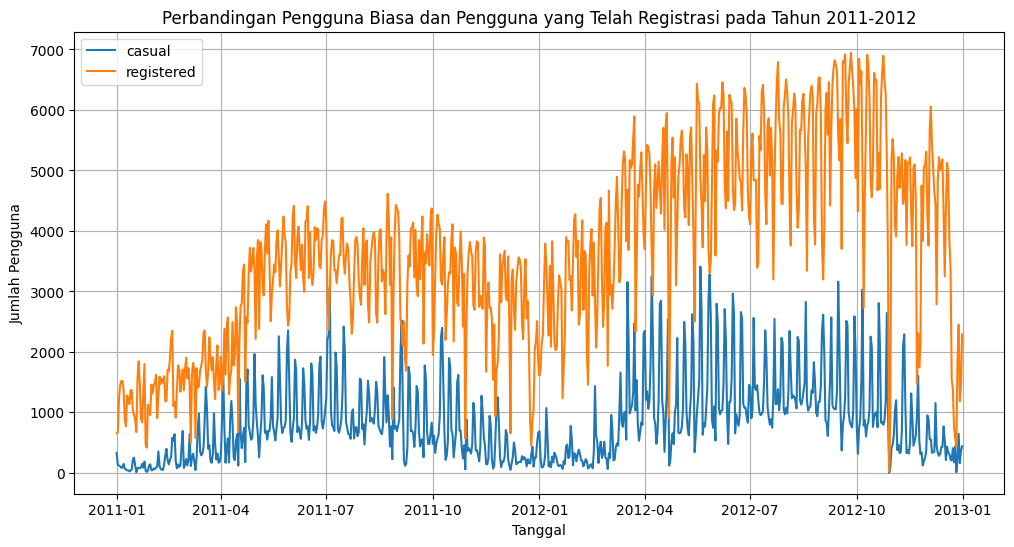

In [10]:
#Line chart untuk melihat perbandingan jumlah pengguna casual dan registered dari 2011-2012
plt.figure(figsize=(12, 6))
plt.plot(day_df["dteday"], day_df["casual"], label ="casual")
plt.plot(day_df["dteday"], day_df["registered"], label = "registered")
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna')
plt.title('Perbandingan Pengguna Biasa dan Pengguna yang Telah Registrasi pada Tahun 2011-2012')
plt.legend()
plt.grid()
plt.show()

### Pertanyaan 2:

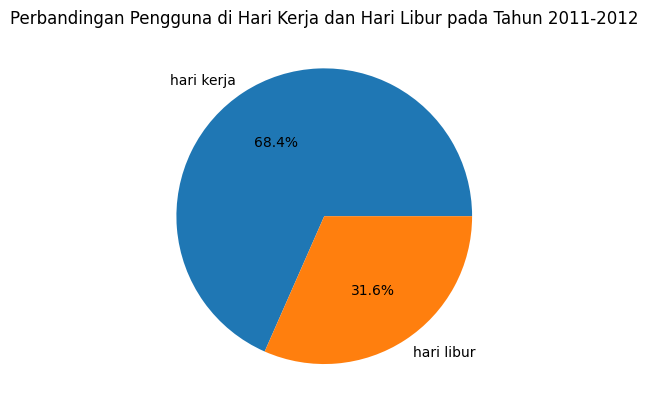

In [11]:
total = (sum(day_df["workingday"] == 1), sum(day_df["workingday"] == 0))
day = ('hari kerja', "hari libur")
plt.pie(
    x=total,
    labels=day,
    autopct='%1.1f%%')
plt.title('Perbandingan Pengguna di Hari Kerja dan Hari Libur pada Tahun 2011-2012')
plt.show()

**Insight:**
- Dari line chart terlihat bahwa jumlah pengguna registered selalu lebih besar dari casual. Namun sejak sekitar bulan Oktober 2012 terlihat adanya penurunan jumlah pengguna registered.
- Dari pie chart terlihat bahwa jumlah pengguna pada hari libur jauh lebih sedikit, kurang dari setengahnya, dibanding pada hari kerja.

## Analisis Lanjutan (Opsional)

### Analisis Deret Waktu untuk Memprediksi Pengguna Registered

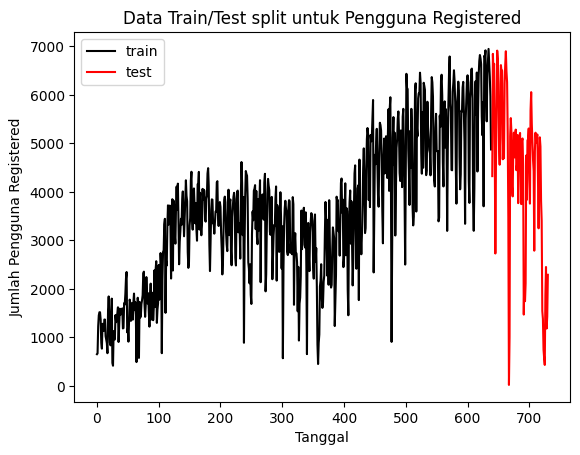

In [12]:
#Pemisahan Data Train dan Test
train = day_df["registered"][day_df.dteday < pd.to_datetime("2012-10-01", format='%Y-%m-%d')]
test = day_df["registered"][day_df.dteday > pd.to_datetime("2012-10-01", format='%Y-%m-%d')]

plt.plot(train, color = "black", label = 'train')
plt.plot(test, color = "red", label = 'test')
plt.ylabel('Jumlah Pengguna Registered')
plt.xlabel('Tanggal')
plt.title("Data Train/Test split untuk Pengguna Registered")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


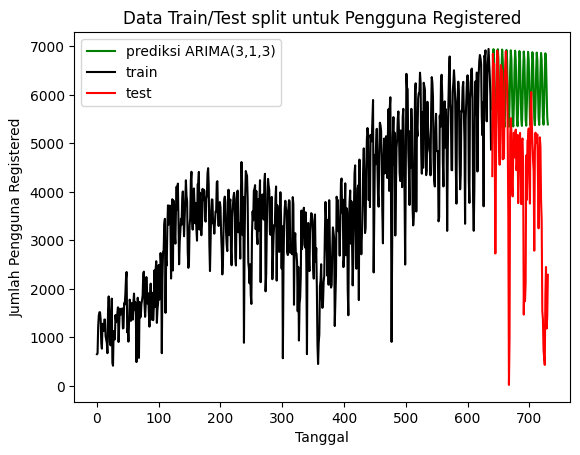

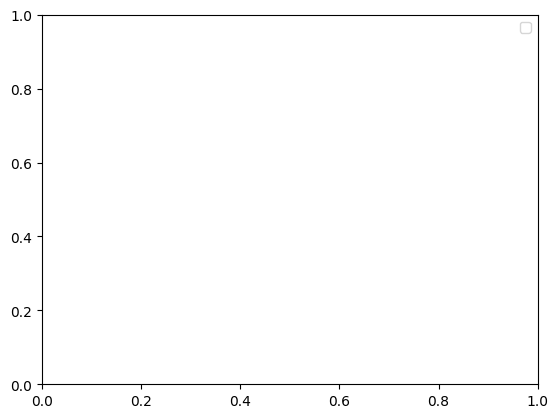

In [13]:
#Import package
from statsmodels.tsa.arima.model import ARIMA
y = train
ARIMAmodel = ARIMA(y, order = (3, 1, 3))
ARIMAmodel = ARIMAmodel.fit()
#Forecasting
pred = ARIMAmodel.get_forecast(len(test.index))
pred_df = pred.conf_int(alpha = 0.05)
pred_df["Predictions"] = ARIMAmodel.predict(start = pred_df.index[0], end = pred_df.index[-1])
pred_df.index = test.index
pred_out = pred_df["Predictions"]
#Plotting
plt.plot(pred_out, color='green', label = 'prediksi ARIMA(3,1,3)')
plt.plot(train, color = "black", label = 'train')
plt.plot(test, color = "red", label = 'test')
plt.ylabel('Jumlah Pengguna Registered')
plt.xlabel('Tanggal')
plt.title("Data Train/Test split untuk Pengguna Registered")
plt.legend()
plt.show()
plt.legend()

Dari plot dapat dibandingkan grafik test dan prediksi yang berbeda. Dari data train diprediksi pengguna registered tetap berosilasi di sektar range yang sama, padahal kenyataannya pada data test terjadi penurunan jumlah pengguna registered.

## Conclusion

- Walaupun jumlah pengguna yang telah registrasi sudah lebih banyak daripada pengguna yang belum, jumlah pengguna yang belum registrasi masih terbilang cukup banyak. Hal ini harus diperhatikan karena registrasi dalam peminjaman sangatlah penting demi keamanan. Pada bagian akhir line chart juga terlihat adanya penurunan jumlah pengguna yang telah registrasi. Hal ini tentu saja akan berdampak kedepannya jika jumlah pengguna yang melakukan registrasi terus menurun. Pihak penyelenggara peminjaman diharapkan dapat lebih mengetatkan aturan registrasi untuk menghindari penurunan lebih lanjut.
- Dari data didapat jumlah peminjam sepeda lebih banyak pada hari kerja dibanding hari libur. Dari segi kesehatan dapat disimpulkan bahwa kebanyakan pengguna lebih banyak meminjam sepeda dengan tujuan mobilisasi ke tempat kerja dibandingkan untuk berolahraga.
- Penurunan data pengguna registered terjadi diluar prediksi deret waktu berdasarkan analisis. Hal ini menunjukkan bahwa perubahan data dapat terjadi secara tiba-tiba. Pihak peminjam harus selalu siap sedia menghadapi terjadinya perubahan data demi kelancaran peminjaman sepeda.